# **Step 1: Install OpenCV**

In [152]:
!pip install opencv-python-headless

# **Step 2: Import Necessary Libraries**

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Functions**

In [154]:
def display_images(images, titles=None):
    """
    Display multiple images side by side.

    Args:
        images (list): List of images to display.
        titles (list, optional): List of titles for each image. Defaults to None.

    Returns:
        None
    """
    n = len(images)
    if titles is None:
        titles = [f"Image {i+1}" for i in range(n)]

    if n == 1:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.imshow(images[0], cmap='gray')  # Use grayscale colormap
        ax.set_title(titles[0])
        ax.axis('off')
    else:
        fig, axs = plt.subplots(1, n, figsize=(n*5, 5))
        for i, (img, title, ax) in enumerate(zip(images, titles, axs)):
            ax.imshow(img, cmap='gray')  # Use grayscale colormap
            ax.set_title(title)
            ax.axis('off')

    plt.show()

# **Step 3: Load an Image**

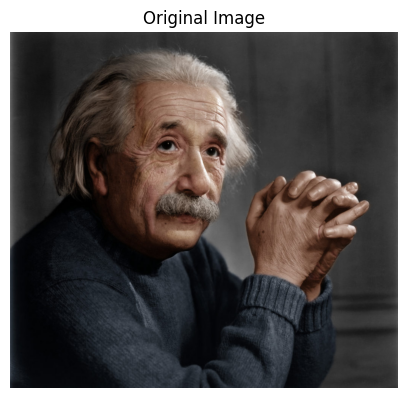

In [155]:
# Loads the image
image = cv2.imread('EINSTEIN.jpg')

# Convert BGR image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

display_images([image],["Original Image"])

# **LAB SESSION 1: Image Transformations**

## Scaling and Rotation

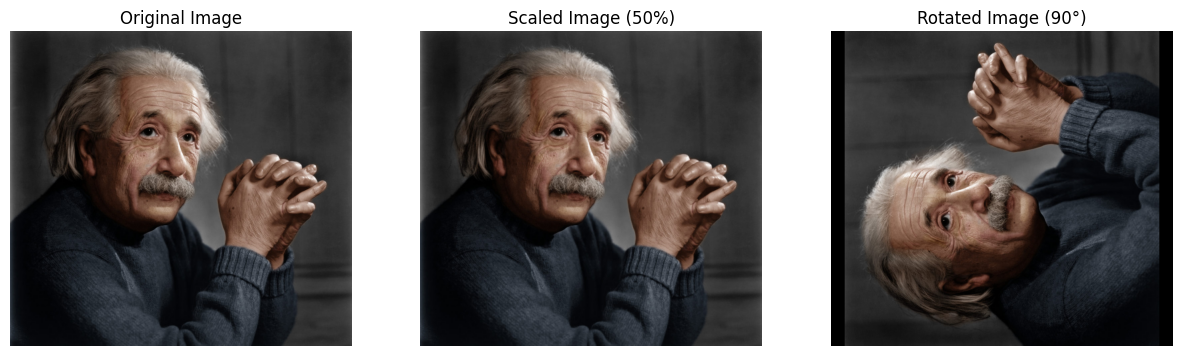

In [156]:
# Scaling
def scale_image (img, scale_factor):
  height, width = img.shape [:2]
  scaled_img = cv2.resize (img, (int(width * scale_factor),
                                    int( height * scale_factor)),
                                    interpolation = cv2.INTER_LINEAR)
  return scaled_img

# Rotate
def rotate_image ( img , angle ) :
  height, width = img.shape [:2]
  center = (width // 2, height // 2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(img, matrix, (width, height))
  return rotated_img

# Scale image by 0.5
scaled_image = scale_image(image, 0.5)

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 90)

display_images([image, scaled_image, rotated_image], ["Original Image", "Scaled Image (50%)", "Rotated Image (90°)"])


# **LAB SESSION 1: Filtering Techniques**

## Blurring and Edge Detection

In [157]:
# Applies a Gaussian blur to the image
def gaussian_blur(img, ksize=(15, 15)):
    return cv2.GaussianBlur(img, ksize, 0)

# Applies a median blur to the image
def median_blur(img, ksize=15):
    return cv2.medianBlur(img, ksize)

# Applies a box blur to the image
def box_blur(img, ksize=(15, 15)):
    return cv2.blur(img, ksize=ksize)

# Applies a bilateral blur to the image
def bilateral_blur(img, d=9, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)

# Applies a motion blur to the image
def motion_blur(img, size=15, angle=0):
  # Create a kernel for motion blur with the specified size
  kernel_motion_blur = np.zeros((size, size))

  # Set the middle row of the kernel to 1, which will be used to blur the image
  kernel_motion_blur[int((size-1)//2), :] = np.ones(size)

  # Normalize the kernel by dividing by its size to ensure the output image has the same intensity
  kernel_motion_blur = kernel_motion_blur / size

  # Apply the motion blur kernel to the input image using OpenCV's filter2D function
  blurred_img = cv2.filter2D(img, -1, kernel_motion_blur)

  # Return the blurred image
  return blurred_img

# Applies the Canny edge detection algorithm to the image
def canny(img, threshold1=100, threshold2=200):
    return cv2.Canny(img, threshold1, threshold2)

# Applies the Sobel edge detection algorithm to the image
def sobel_edge_detection(img):
    # Sobel edge detection in the x direction
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    # Sobel edge detection in the y direction
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    # Combine the two gradients
    grad = np.sqrt(grad_x**2 + grad_y**2)
    # Normalize to [0, 255]
    image = np.uint8(grad / grad.max() * 255)
    return image

# Applies the Laplacian edge detection algorithm to the image
def laplacian_edge_detection(img):
    # Apply Laplacian operator
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    # Normalize to [0, 255]
    image = np.uint8(laplacian / laplacian.max() * 255)
    return image

# Applies the Prewitt edge detection algorithm to the image
def prewitt_edge_detection(img):
    # Prewitt operator kernels for x and y directions
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    # Applying the Prewitt operator
    grad_x = cv2.filter2D(img, -1, kernel_x)
    grad_y = cv2.filter2D(img, -1, kernel_y)
    # Combine the x and y gradients by converting to floating point
    grad = np.sqrt(grad_x**2 + grad_y**2)
    # Normalize to [0, 255]
    image = np.uint8(grad / grad.max() * 255)
    return image

In [158]:
gaussian_blur_image = gaussian_blur(image)
median_blur_image = median_blur(image)
box_blur_image = box_blur(image)
bilateral_blur_image = bilateral_blur(image)
motion_blur_image = motion_blur(image)

canny_image = canny(image, 100, 200)
sobel_image = sobel_edge_detection(image)
laplacian_image = laplacian_edge_detection(image)
prewitt_image = prewitt_edge_detection(image)

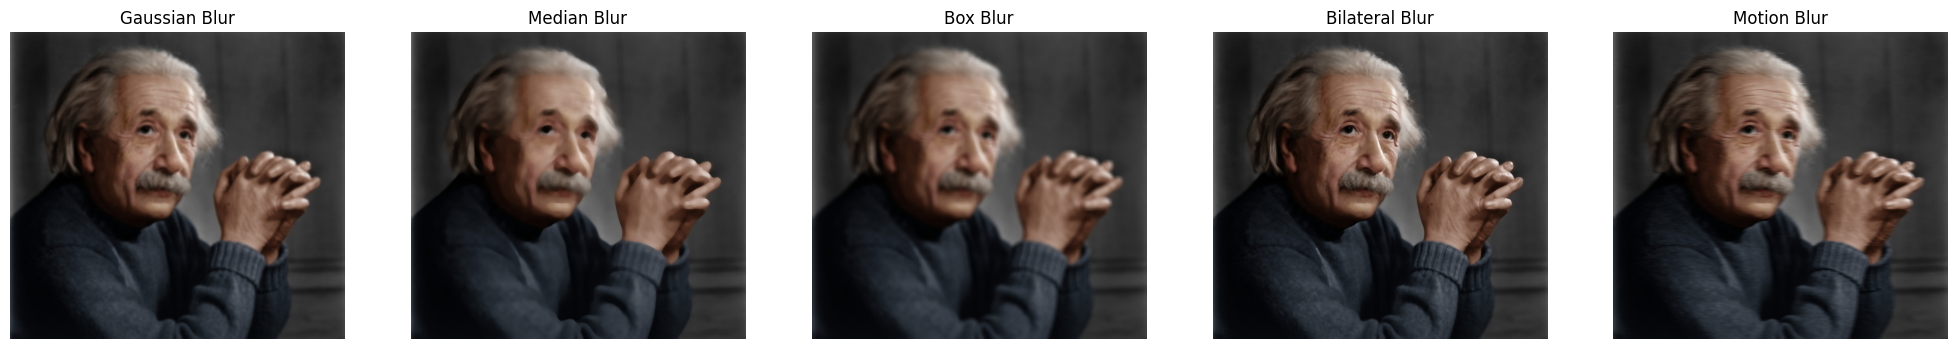

In [159]:
display_images([gaussian_blur_image,
                median_blur_image,
                box_blur_image,
                bilateral_blur_image,
               motion_blur_image],
               ['Gaussian Blur',
                'Median Blur',
                'Box Blur',
                'Bilateral Blur',
                'Motion Blur'])

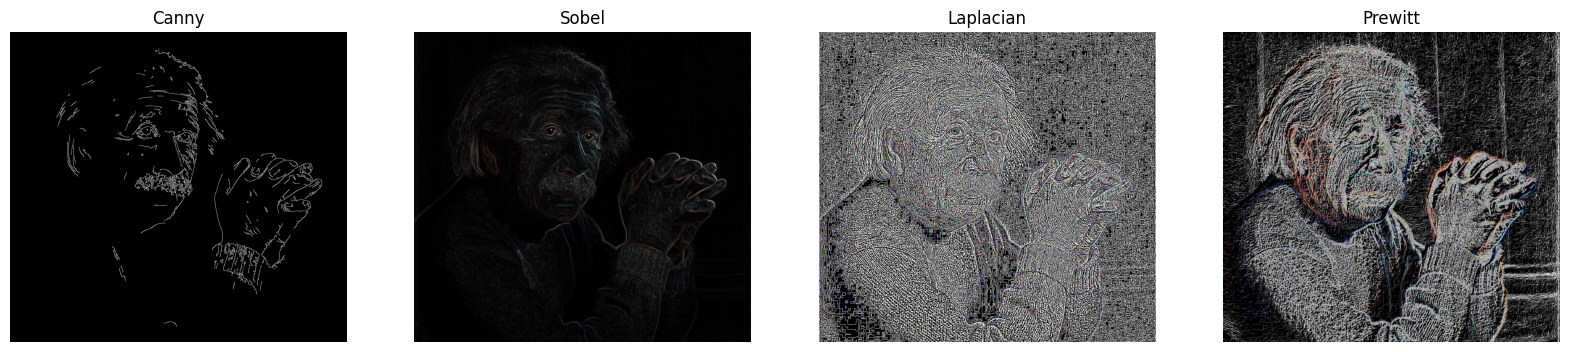

In [160]:
display_images([canny_image,
                sobel_image,
                laplacian_image,
                prewitt_image],
               ['Canny',
                'Sobel',
                'Laplacian',
                'Prewitt'])

# **Problem-Solving Session**

## Common Image Processing Tasks

  ### Scenario 1: Scaling and Rotation
   * Problem:  Standardizing product images for an e-commerce website.
   * Explanation: This scenario addresses the common challenge of dealing with product images of varying sizes and orientations in e-commerce. The goal is to create a consistent visual presentation across the website.

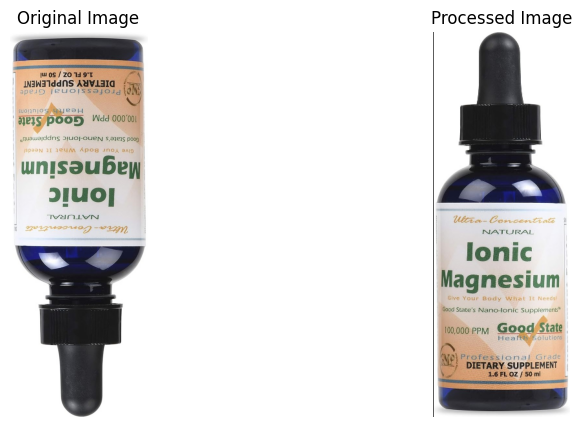

In [161]:
# Load the image
image = cv2.imread('product.jpg')

# Convert BGR image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Scale the image
scaled_image = scale_image(image, 0.5)

# Rotate the scaled image
rotated_image = rotate_image(scaled_image, 180)

# Save the processed image
cv2.imwrite('processed_product.jpg', rotated_image)

# Display results
display_images([image, rotated_image], ["Original Image", "Processed Image"])
cv2.waitKey(0)
cv2.destroyAllWindows()

* Scaling: We use the scale_image function, which employs OpenCV's resize method with bilinear interpolation. This approach provides a good balance between speed and quality for most images. The function allows for both upscaling and downscaling, with a scale factor to determine the new size relative to the original.
* Rotation: The rotate_image function uses an affine transformation to rotate the image around its center. This is crucial for correcting image orientation. The function can handle any rotation angle, making it versatile for various image orientations.

By combining these operations, we can ensure that all product images are displayed at a consistent size and orientation, improving the overall aesthetic and user experience of the e-commerce platform.

  ### Scenario 2: Blurring (Image Smoothing)
   * Problem: Implementing a skin-softening feature in a photo editing app.
   * Explanation: This scenario tackles the challenge of selectively smoothing skin textures in portrait photos, a common feature in photo editing applications.

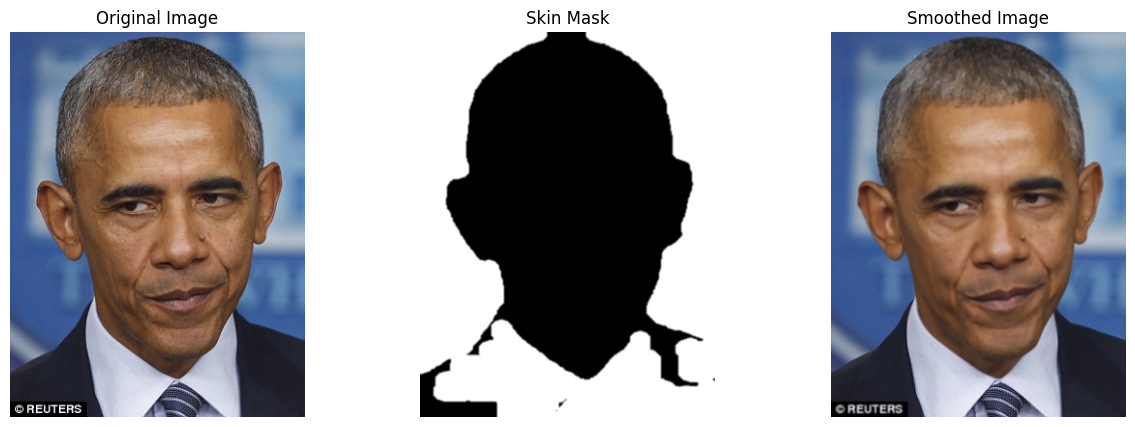

In [162]:
# Define a basic skin detection function
def detect_skin(img):
    # Convert the image to YCrCb color space
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    # Define the range of skin color in YCrCb
    lower = np.array([0, 133, 77], dtype=np.uint8)
    upper = np.array([255, 173, 127], dtype=np.uint8)

    # Create a binary mask for skin pixels
    skin_mask = cv2.inRange(ycrcb, lower, upper)

    # Apply morphological operations to clean up the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    skin_mask = cv2.erode(skin_mask, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=2)

    # Blur the mask to smooth out the edges
    skin_mask = gaussian_blur(skin_mask, (3, 3))

    return skin_mask

# Define smooth skin function
def smooth_skin(image, skin_mask):
    blurred = gaussian_blur(image, (3, 3))
    bilateral = bilateral_blur(blurred, d=3, sigmaColor=20, sigmaSpace=20)

    result = np.where(skin_mask[..., np.newaxis] == 255, image, bilateral)
    return result

# Usage
img = cv2.imread('portrait.jpg')

# Convert BGR image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if img is None:
    print("Error: Could not read the image file.")
else:
    skin_mask = detect_skin(img)
    smoothed_img = smooth_skin(img, skin_mask)

    # Display results
    display_images([img, skin_mask, smoothed_img], ["Original Image", "Skin Mask", "Smoothed Image"])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Save the smoothed image
    cv2.imwrite('smoothed_portrait.jpg', smoothed_img)

* Gaussian Blur: The gaussian_blur function applies a Gaussian filter to the entire image. This creates a general softening effect but can be too strong if applied uniformly.
* Bilateral Filtering: The bilateral_blur function is an edge-preserving smoothing filter. It's particularly effective for skin smoothing, reducing noise while preserving important edge details.
* Skin Smoothing: The smooth_skin function combines these blurring techniques with a skin mask. It applies the smoothing only to detected skin regions, preserving facial features and other details.

This approach allows for a natural-looking skin softening effect, enhancing portrait photos without losing important facial characteristics. The combination of Gaussian and bilateral filtering provides a balance between smoothing and detail preservation.

### Scenario 3: Document Edge Detection and Cropping
  * Problem: Implementing a document edge detection and cropping feature in a document scanner app.
  * Explanation: This scenario tackles the challenge of selectively detecting and cropping the edges of a document from a scanned image or a photo, a common feature in document scanning applications.

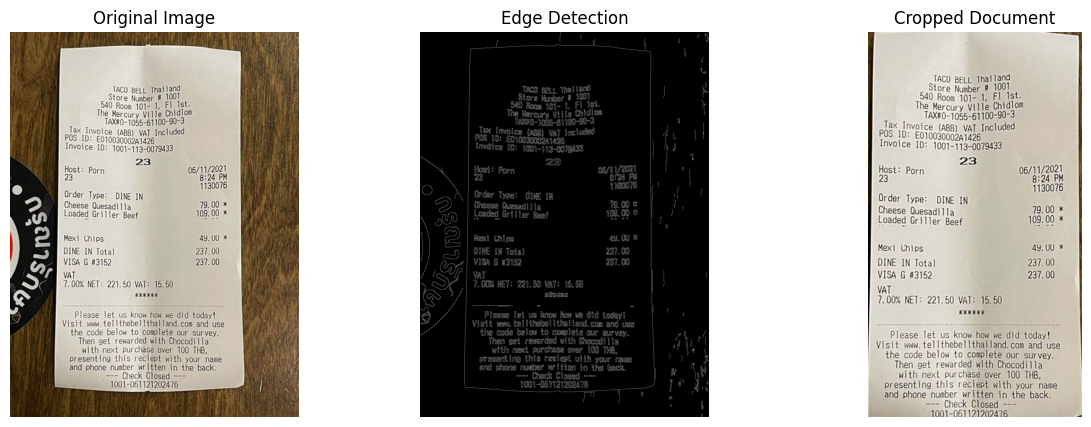

In [163]:
def detect_edges(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = gaussian_blur(gray, (5, 5))

    # Perform Canny edge detection
    edges = canny(blurred, 50, 150)

    return edges

def find_contours(image, edges):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find the largest one (assumed to be the document)
    largest_contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    return approx

def crop_document(image, contour):
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Crop the image using the bounding box
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

# Usage
img = cv2.imread('receipt.jfif')

# Convert BGR image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if img is None:
    print("Error: Could not read the image file.")
else:
    # Detect edges
    edges = detect_edges(img)

    # Find contours
    contour = find_contours(img, edges)

    # Crop the document
    cropped_img = crop_document(img, contour)

    # Display results
    display_images([img, edges, cropped_img], ["Original Image", "Edge Detection", "Cropped Document"])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Save the cropped document image
    cv2.imwrite('cropped_document.jpg', cropped_img)

* Edge Detection: The detect_edges function converts the image to grayscale, applies Gaussian blur to reduce noise, and then uses the Canny edge detection algorithm to identify edges in the image.
* Contour Detection: The find_contours function finds contours in the edge-detected image using cv2.findContours. It then filters the contours to find the largest one, which is assumed to be the document. The contour is approximated to a polygon using cv2.approxPolyDP.
* Document Cropping: The crop_document function calculates the bounding box of the detected contour using cv2.boundingRect, and crops the image using this bounding box to isolate the document content. This approach is simpler and more straightforward compared to using perspective transforms.

This solution provides a way to detect and crop the document content, making it easier to process scanned documents or images of documents. The result is an image with the document content isolated from the background.

# **Assignment**

## Implementing Image Transformations and Filtering

### Scaling

In [164]:
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img, (int(width * scale_factor), int(height * scale_factor)),
                            interpolation=cv2.INTER_LINEAR)
    return scaled_img

Explanation:

* This function uses cv2.resize with cv2.INTER_LINEAR interpolation to resize an image.
* scale_factor determines the new size relative to the original.
* Linear interpolation is a good balance between speed and quality for most images

### Rotation

In [165]:
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

Explanation:

* This function rotates an image by a specified angle.
* It uses cv2.getRotationMatrix2D to calculate the rotation matrix.
* cv2.warpAffine applies the rotation matrix to the image.

### Gaussian Blur

In [166]:
def gaussian_blur(img, ksize=(15, 15)):
    return cv2.GaussianBlur(img, ksize, 0)

Explanation:

* This function applies a Gaussian blur using cv2.GaussianBlur.
* The ksize parameter controls the kernel size (e.g., (5, 5) for a 5x5 kernel).

### Median Blur

In [167]:
def median_blur(img, ksize=15):
    return cv2.medianBlur(img, ksize)

Explanation:

* This function applies a median blur using cv2.medianBlur.
* ksize defines the kernel size (e.g., 5 for a 5x5 kernel).

### Box Blur

In [168]:
def box_blur(img, ksize=(15, 15)):
    return cv2.blur(img, ksize=ksize)

Explanation:

* This function applies a box blur using cv2.blur.
* ksize defines the kernel size (e.g., (5, 5) for a 5x5 kernel).

### Bilateral Blur

In [169]:
def bilateral_blur(img, d=9, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)

Explanation:

* This function applies a bilateral blur using cv2.bilateralFilter.
* d controls the diameter of the neighborhood.
* sigmaColor defines the filter sigma in the color space.
* sigmaSpace defines the filter sigma in the coordinate space.

### Motion Blur

In [170]:
def motion_blur(img, size=15, angle=0):
    # Create a kernel for motion blur with the specified size
    kernel_motion_blur = np.zeros((size, size))

    # Set the middle row of the kernel to 1, which will be used to blur the image
    kernel_motion_blur[int((size-1)//2), :] = np.ones(size)

    # Normalize the kernel by dividing by its size to ensure the output image has the same intensity
    kernel_motion_blur = kernel_motion_blur / size

    # Apply the motion blur kernel to the input image using OpenCV's filter2D function
    blurred_img = cv2.filter2D(img, -1, kernel_motion_blur)

    # Return the blurred image
    return blurred_img

Explanation:

* This function applies a motion blur.
* It creates a motion blur kernel (a line of 1s with specified length).
* cv2.filter2D applies the kernel to the image.

### Canny Edge Detection

In [171]:
def canny(img, threshold1=100, threshold2=200):
    return cv2.Canny(img, threshold1, threshold2)

Explanation:
* This function implements the Canny edge detection algorithm using cv2.Canny.
* threshold1 and threshold2 control the hysteresis thresholding for edge detection.

### Sobel Edge Detection

In [172]:
def sobel_edge_detection(img):
    # Sobel edge detection in the x direction
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    # Sobel edge detection in the y direction
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    # Combine the two gradients
    grad = np.sqrt(grad_x**2 + grad_y**2)
    # Normalize to [0, 255]
    image = np.uint8(grad / grad.max() * 255)
    return image

Explanation:

* This function applies the Sobel edge detection algorithm to an image.
* It calculates gradients in both x and y directions using cv2.Sobel.
* The gradients are combined using the Euclidean distance formula.
* The result is normalized to the range [0, 255].
* The output is an image with detected edges.

### Laplacian Edge Detection

In [173]:
def laplacian_edge_detection(img):
    # Apply Laplacian operator
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    # Normalize to [0, 255]
    image = np.uint8(laplacian / laplacian.max() * 255)
    return image

Explanation:

* This function applies the Laplacian edge detection algorithm to an image.
* It uses the cv2.Laplacian function to compute the Laplacian of the image.
* The result is normalized to the range [0, 255].
* The output is an image with detected edges.

### Prewitt Edge Detection

In [174]:
def prewitt_edge_detection(img):
    # Prewitt operator kernels for x and y directions
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    # Applying the Prewitt operator
    grad_x = cv2.filter2D(img, -1, kernel_x)
    grad_y = cv2.filter2D(img, -1, kernel_y)
    # Combine the x and y gradients by converting to floating point
    grad = np.sqrt(grad_x**2 + grad_y**2)
    # Normalize to [0, 255]
    image = np.uint8(grad / grad.max() * 255)
    return image

Explanation:

* This function applies the Prewitt edge detection algorithm to an image.
* It defines Prewitt operator kernels for x and y directions.
* The kernels are applied to the image using cv2.filter2D.
* The gradients are combined using the Euclidean distance formula.
* The result is normalized to the range [0, 255].
* The output is an image with detected edges.

## Application of all the Techniques

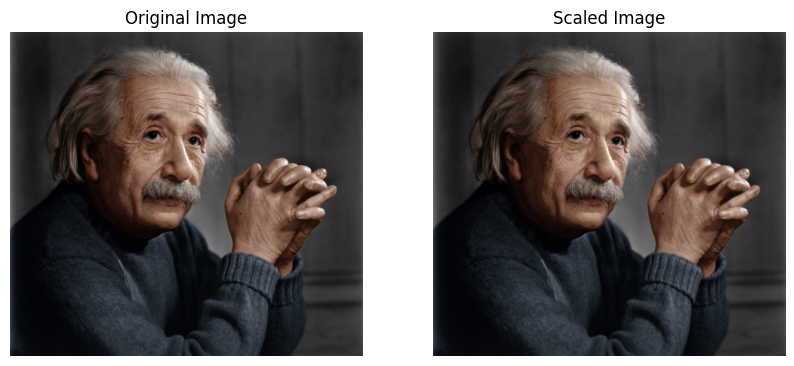

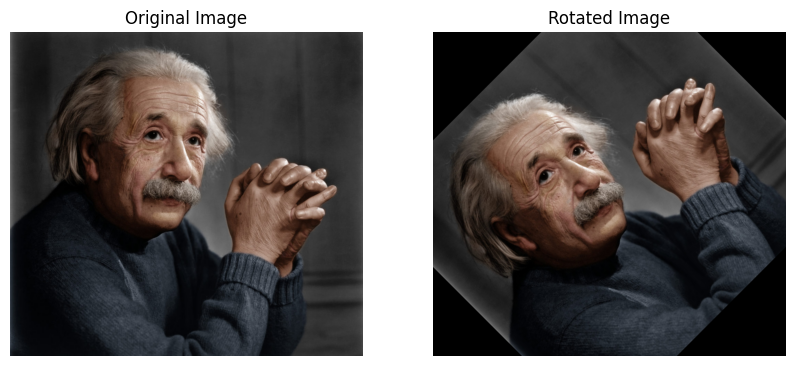

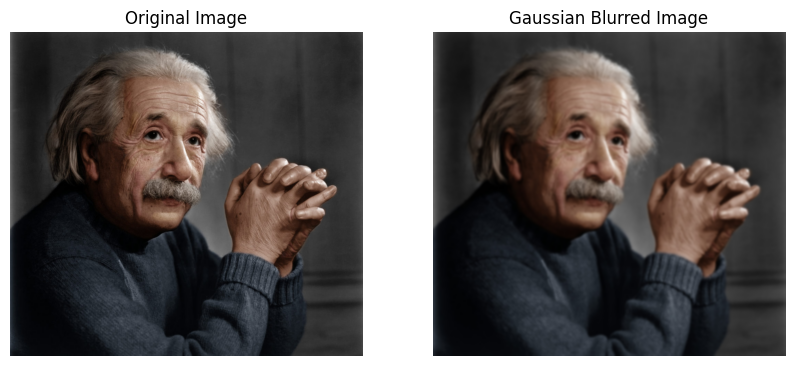

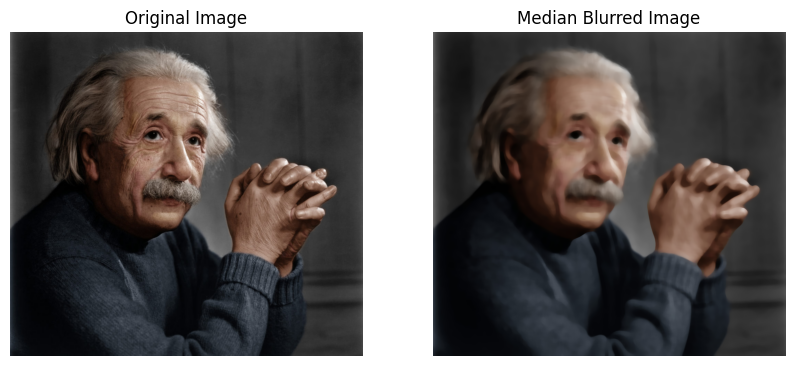

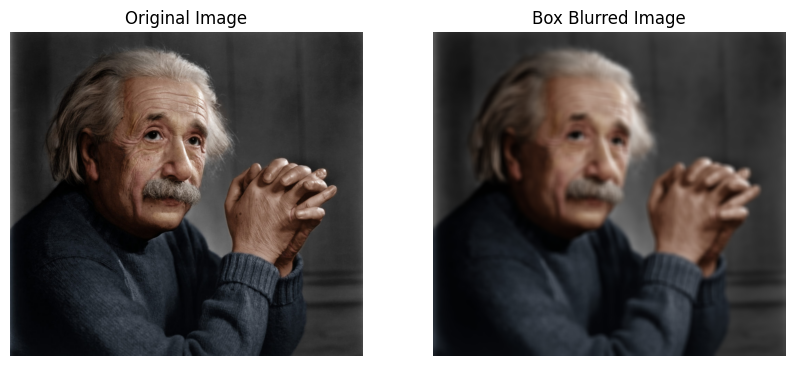

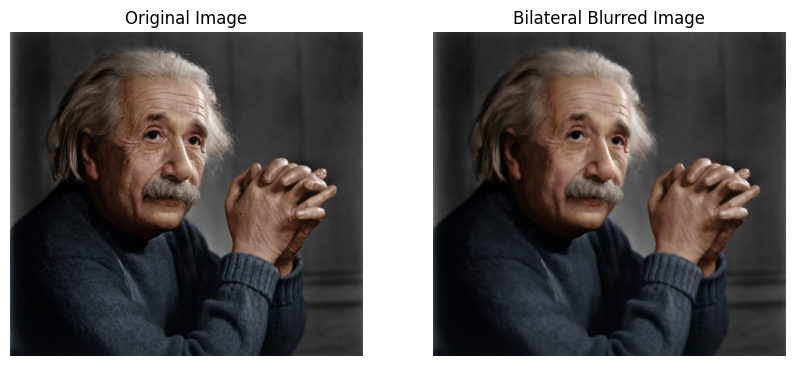

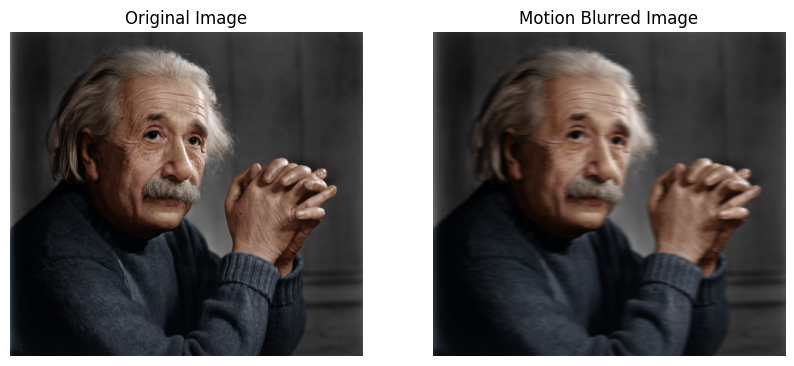

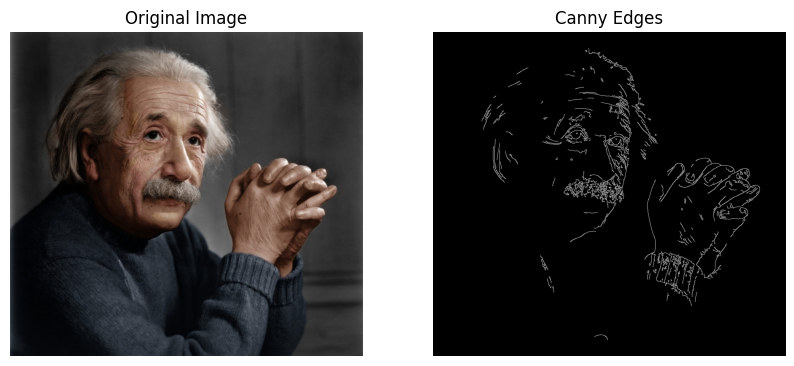

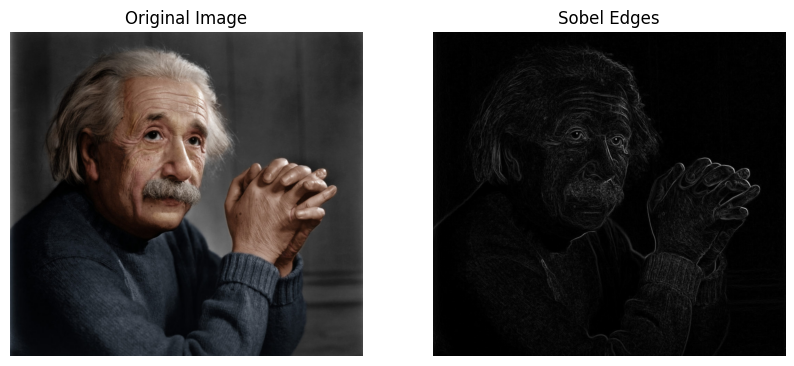

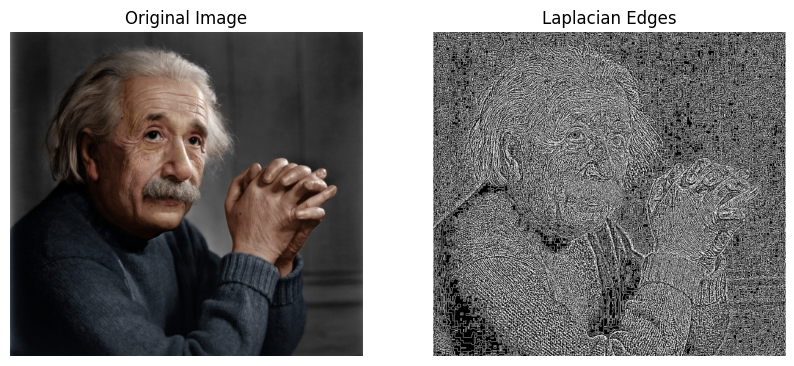

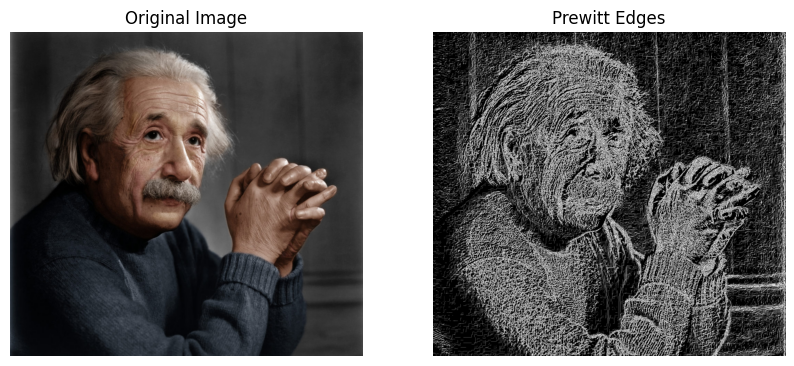

In [175]:
# Load Image
image = cv2.imread('EINSTEIN.jpg')  # Replace with your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

# --- Image Transformations ---

# Scaling
scaled_image = scale_image(image, 0.5)
display_images([image, scaled_image], ["Original Image", "Scaled Image"])

# Rotation
rotated_image = rotate_image(image, 45)
display_images([image, rotated_image], ["Original Image", "Rotated Image"])

# --- Image Blurring ---

# Gaussian Blur
gaussian_blurred_image = gaussian_blur(image)
display_images([image, gaussian_blurred_image], ["Original Image", "Gaussian Blurred Image"])

# Median Blur
median_blurred_image = median_blur(image)
display_images([image, median_blurred_image], ["Original Image", "Median Blurred Image"])

# Box Blur
box_blurred_image = box_blur(image)
display_images([image, box_blurred_image], ["Original Image", "Box Blurred Image"])

# Bilateral Blur
bilateral_blurred_image = bilateral_blur(image)
display_images([image, bilateral_blurred_image], ["Original Image", "Bilateral Blurred Image"])

# Motion Blur
motion_blurred_image = motion_blur(image, size=15, angle=45)
display_images([image, motion_blurred_image], ["Original Image", "Motion Blurred Image"])

# --- Edge Detection ---

# Canny Edge Detection
canny_edges = canny(image)  # Convert to grayscale before applying Canny
display_images([image, canny_edges], ["Original Image", "Canny Edges"])

# Sobel Edge Detection
sobel_edges = sobel_edge_detection(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
display_images([image, sobel_edges], ["Original Image", "Sobel Edges"])

# Laplacian Edge Detection
laplacian_edges = laplacian_edge_detection(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
display_images([image, laplacian_edges], ["Original Image", "Laplacian Edges"])

# Prewitt Edge Detection
prewitt_edges = prewitt_edge_detection(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
display_images([image, prewitt_edges], ["Original Image", "Prewitt Edges"])

Explanation:

* This function applies the Prewitt edge detection algorithm to an image.
* It defines Prewitt operator kernels for x and y directions.
* The kernels are applied to the image using cv2.filter2D.
* The gradients are combined using the Euclidean distance formula.
* The result is normalized to the range [0, 255].
* The output is an image with detected edges.

**Image Transformation**:

1. Scaling: Implemented using cv2.resize with linear interpolation.
2. Rotation: Achieved using cv2.getRotationMatrix2D and cv2.warpAffine.

**Image Blurring:**

1. Gaussian Blur: Applied using cv2.GaussianBlur.
2. Median Blur: Implemented with cv2.medianBlur.
3. Box Blur: Utilized cv2.blur.
4. Bilateral Blur: Employed cv2.bilateralFilter for edge-preserving smoothing.
5. Motion Blur: Custom implementation using a motion blur kernel and cv2.filter2D.

**Edge Detection:**

1. Canny Edge Detection: Applied using cv2.Canny.
2. Sobel Edge Detection: Implemented using cv2.Sobel in both x and y directions.
3. Laplacian Edge Detection: Utilized cv2.Laplacian.
4. Prewitt Edge Detection: Custom implementation using Prewitt operator kernels and cv2.filter2D.

**Image Transformation:**

* Successfully implemented scaling and rotation functions.
* Scaling allows for resizing images while maintaining aspect ratio.
* Rotation function can rotate images by any specified angle.

**Image Blurring:**

* Implemented various blurring techniques, each with unique characteristics:
  * Gaussian Blur: Effective for general noise reduction.
  * Median Blur: Particularly useful for salt-and-pepper noise removal.
  * Box Blur: Simple and fast blurring method.
  * Bilateral Blur: Preserves edges while smoothing flat areas.
  * Motion Blur: Simulates the effect of camera or object motion.

**Edge Detection:**

* Successfully implemented multiple edge detection algorithms:
  * Canny: Provides good edge detection with noise suppression.
  * Sobel: Emphasizes vertical and horizontal edges.
  * Laplacian: Detects edges in both directions simultaneously.
  * Prewitt: Similar to Sobel but with different kernel values.